### Attempt to download and save Pandas dataframes for all `OptimizationDataset`s, `TorsionDriveDataset`s, and `GridOptimizationDataset`s in QCArchive

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from collections import namedtuple

from typing import Tuple

import qcportal
from openforcefield.topology import Molecule

#### Initialize FractalClient

As documented here: http://docs.qcarchive.molssi.org/projects/QCPortal/en/stable/client.html

In [1]:
client = qcportal.FractalClient()
client

FractalClient(server_name='The MolSSI QCArchive Server', address='https://api.qcarchive.molssi.org:443/', username='None')

#### List all collections

In [3]:
collections: dict = client.list_collections(aslist=True)
for dataset_type in collections.keys():
    dataset_names = sorted(collections[dataset_type])
    print(f'"{dataset_type}" ({len(dataset_names)} datasets)')
    for i, dataset_name in enumerate(dataset_names):
        print(f'\t{i}: "{dataset_name}"')

"TorsionDriveDataset" (35 datasets)
	0: "Fragment Stability Benchmark"
	1: "Fragmenter paper"
	2: "OpenFF DANCE 1 eMolecules t142 v1.0"
	3: "OpenFF Fragmenter Validation 1.0"
	4: "OpenFF Full TorsionDrive Benchmark 1"
	5: "OpenFF Gen 2 Torsion Set 1 Roche"
	6: "OpenFF Gen 2 Torsion Set 1 Roche 2"
	7: "OpenFF Gen 2 Torsion Set 2 Coverage"
	8: "OpenFF Gen 2 Torsion Set 2 Coverage 2"
	9: "OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy"
	10: "OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2"
	11: "OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy"
	12: "OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2"
	13: "OpenFF Gen 2 Torsion Set 5 Bayer"
	14: "OpenFF Gen 2 Torsion Set 5 Bayer 2"
	15: "OpenFF Gen 2 Torsion Set 6 Supplemental"
	16: "OpenFF Gen 2 Torsion Set 6 Supplemental 2"
	17: "OpenFF Group1 Torsions"
	18: "OpenFF Group1 Torsions 2"
	19: "OpenFF Group1 Torsions 3"
	20: "OpenFF Primary Benchmark 1 Torsion Set"
	21: "OpenFF Primary Benchmark 2 Torsion Set"
	22: "OpenFF Primary TorsionD

#### TODO: Loop over `(dataset_type, dataset_name)` pairs

#### Fetch dataset

In [4]:
dataset_type = 'OptimizationDataset'
dataset_name = 'OpenFF Full Optimization Benchmark 1'

In [5]:
ds = client.get_collection(dataset_type, dataset_name)
print(dir(ds))

['DataModel', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_entry', '_add_molecules_by_dict', '_add_specification', '_check_client', '_check_entry_exists', '_get_index', '_get_procedure_ids', '_internal_compute_add', '_pre_save_prep', 'add_entry', 'add_specification', 'client', 'compute', 'counts', 'data', 'df', 'from_json', 'from_server', 'get_entry', 'get_record', 'get_specification', 'list_specifications', 'name', 'query', 'save', 'status', 'to_json']


In [7]:
type(ds), len(ds.df)

(qcportal.collections.optimization_dataset.OptimizationDataset, 26736)

In [8]:
ds.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [9]:
specifications = ds.list_specifications(description=False)
specifications

['default']

In [10]:
# TODO: Also loop over specifications, in case there's more than one
specification = specifications[0]

In [11]:
index = list(ds.df.index)
print(len(index))
print(index[0])

26736
C[NH2+]C[C@@H](c1ccc(c(c1)O)O)O-0


In [13]:
ds

<OptimizationDataset(name=`OpenFF Full Optimization Benchmark 1`, id='197', client='https://api.qcarchive.molssi.org:443/') >

In [14]:
record_names = list(ds.data.records)
record_names[:10]

['c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-0',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-1',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-2',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-3',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-4',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-5',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-6',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-7',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-8',
 'c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-9']

In [39]:
i = 0
record_name = record_names[i]
ind = index[i]
record_name, ind

('c[nh2+]c[c@@h](c1ccc(c(c1)o)o)o-0', 'C[NH2+]C[C@@H](c1ccc(c(c1)O)O)O-0')

In [40]:
record = ds.get_record(record_name, specification)
type(record)

qcportal.models.records.OptimizationRecord

In [41]:
print(dir(record))

['Config', '__abstractmethods__', '__annotations__', '__base_doc__', '__class__', '__config__', '__custom_root_type__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__field_defaults__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_validators__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__json_encoder__', '__le__', '__lt__', '__model_autodoc_applied__', '__module__', '__ne__', '__new__', '__post_root_validators__', '__pre_root_validators__', '__pretty__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__schema_cache__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__validators__', '__values__', '__weakref__', '_abc_impl', '_calculate_keys', '_decompose_class', '_get_value', '_hash_indices', '_iter', '_kvstore_getter', 'cache', 'check_client', 'check_keywords', 'check_program', 'client'

In [42]:
initial_mol = record.get_initial_molecule()

In [43]:
entry = ds.get_entry(ind)
print(dir(entry))

['Config', '__abstractmethods__', '__annotations__', '__base_doc__', '__class__', '__config__', '__custom_root_type__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__field_defaults__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_validators__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__json_encoder__', '__le__', '__lt__', '__model_autodoc_applied__', '__module__', '__ne__', '__new__', '__post_root_validators__', '__pre_root_validators__', '__pretty__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__schema_cache__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__validators__', '__values__', '__weakref__', '_abc_impl', '_calculate_keys', '_decompose_class', '_get_value', '_iter', 'additional_keywords', 'attributes', 'compare', 'construct', 'copy', 'dict', 'fields', 'from_orm', 'init

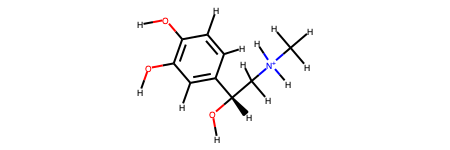

In [44]:
offmol = Molecule.from_qcschema(entry)
offmol

In [45]:
molecular_trajectory = record.get_molecular_trajectory()
trajectory = record.get_trajectory()
len(molecular_trajectory), len(trajectory)

(36, 36)

In [46]:
def get_energy_and_gradient(snapshot: qcportal.models.records.ResultRecord) -> Tuple[float, np.ndarray]:
    """Note: force = - gradient"""
    d = snapshot.dict()
    qcvars = d['extras']['qcvars']
    energy = qcvars['CURRENT ENERGY']
    flat_gradient = np.array(qcvars['CURRENT GRADIENT'])
    num_atoms = len(flat_gradient) // 3
    gradient = flat_gradient.reshape((num_atoms, 3))
    return energy, gradient

In [100]:
MolWithTargets = namedtuple('MolWithTargets', ['offmol', 'xyz', 'energies', 'gradients'])

In [102]:
%%time
_ = MolWithTargets(offmol, xyz, energies, gradients)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs


In [178]:
def get_mol_with_targets(record, entry):
    
    # offmol
    offmol = Molecule.from_qcschema(entry)
    
    # trajectory containing xyz, energies, and gradients
    trajectory = record.get_trajectory()
    
    # xyz
    molecules = [snapshot.get_molecule() for snapshot in trajectory]
    xyz = np.array([mol.geometry for mol in molecules])
    
    # energies and gradients
    energies_and_gradients = list(map(get_energy_and_gradient, trajectory))
    energies = np.array([e for (e, _) in energies_and_gradients])
    gradients = np.array([g for (_, g) in energies_and_gradients])
    
    return MolWithTargets(offmol, xyz, energies, gradients)

In [179]:
i = 0

In [180]:
record_name = record_names[i]
ind = index[i]

record = ds.get_record(record_name, specification)
entry = ds.get_entry(ind)

In [181]:
%%time
_ = get_mol_with_targets(record, entry)

CPU times: user 703 ms, sys: 43.6 ms, total: 747 ms
Wall time: 5.86 s


In [182]:
%%time
_ = get_mol_with_targets(record, entry)

CPU times: user 74.8 ms, sys: 1.38 ms, total: 76.1 ms
Wall time: 74.9 ms


In [196]:
record_names = list(ds.data.records)

In [197]:
all_mols_and_targets = dict()

In [198]:
record_names = list(ds.data.records)
len(record_names)

26736

In [199]:
exceptions = dict()
skipped_status = dict()

In [200]:
record_name = record_names[0]
success_record = ds.get_record(record_name, specification)
success_status = success_record.status
success_status

<RecordStatusEnum.complete: 'COMPLETE'>

In [201]:
trange = tqdm(range(len(index)))
for i in trange:
    
    # record and entry
    record_name = record_names[i]
    ind = index[i]
    
    record = ds.get_record(record_name, specification)
    entry = ds.get_entry(ind)
    
    # offmol with targets
    status = record.status
    status_string = status.name
    
    if status_string == 'complete':
        try:
            all_mols_and_targets[record_name] = get_mol_with_targets(record, entry)
        except Exception as e:
            print(f'unspecified problem encountered with {record_name}!')
            exceptions[record_name] = e
    else:
        print(f'skipping {record_name}, which has a status {status}')
        skipped_status[record_name] = status
    
    
    trange.set_postfix(
        n_skipped=len(skipped_status),
        n_exceptions=len(exceptions),
        n_successful=len(all_mols_and_targets)
    )

  0%|          | 11/26736 [00:47<25:19:03,  3.41s/it, n_exceptions=0, n_skipped=2, n_successful=10]

skipping co/n=c/1\c[n@](c[c@h]1c[nh3+])c2c(cc3c(=o)c(cn(c3n2)c4cc4)c(=o)[o-])f-0, which has a status ERROR
skipping co/n=c/1\c[n@](c[c@h]1c[nh3+])c2c(cc3c(=o)c(cn(c3n2)c4cc4)c(=o)[o-])f-1, which has a status ERROR


  0%|          | 13/26736 [00:47<17:56:58,  2.42s/it, n_exceptions=0, n_skipped=3, n_successful=10]

skipping co/n=c/1\c[n@](c[c@h]1c[nh3+])c2c(cc3c(=o)c(cn(c3n2)c4cc4)c(=o)[o-])f-2, which has a status ERROR


  0%|          | 15/26736 [01:02<32:40:29,  4.40s/it, n_exceptions=0, n_skipped=4, n_successful=11]

skipping co/n=c/1\c[n@](c[c@h]1c[nh3+])c2c(cc3c(=o)c(cn(c3n2)c4cc4)c(=o)[o-])f-4, which has a status ERROR


  0%|          | 89/26736 [12:11<66:47:25,  9.02s/it, n_exceptions=0, n_skipped=5, n_successful=84] 

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-1, which has a status ERROR


  0%|          | 90/26736 [12:12<47:29:31,  6.42s/it, n_exceptions=0, n_skipped=6, n_successful=84]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-2, which has a status ERROR


  0%|          | 96/26736 [13:20<53:05:48,  7.18s/it, n_exceptions=0, n_skipped=8, n_successful=88] 

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-7, which has a status ERROR
skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-0, which has a status ERROR


  0%|          | 97/26736 [13:20<37:34:09,  5.08s/it, n_exceptions=0, n_skipped=9, n_successful=88]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-1, which has a status ERROR


  0%|          | 101/26736 [14:05<59:35:13,  8.05s/it, n_exceptions=0, n_skipped=10, n_successful=91]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-5, which has a status ERROR


  0%|          | 103/26736 [14:13<42:12:11,  5.70s/it, n_exceptions=0, n_skipped=11, n_successful=92]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-7, which has a status ERROR


  0%|          | 106/26736 [14:48<59:05:56,  7.99s/it, n_exceptions=0, n_skipped=12, n_successful=94]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-2, which has a status ERROR


  0%|          | 109/26736 [15:17<59:20:12,  8.02s/it, n_exceptions=0, n_skipped=13, n_successful=96]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-5, which has a status ERROR


  0%|          | 111/26736 [15:33<54:02:20,  7.31s/it, n_exceptions=0, n_skipped=14, n_successful=97]

skipping cc(c)c[c@h]1c(=o)n2ccc[c@h]2[c@]3(n1c(=o)[c@](o3)(c(c)c)nc(=o)[c@h]4c[n@@h+]([c@@h]5cc6c7c(cccc7[nh]c6br)c5=c4)c)o-7, which has a status ERROR


  1%|▏         | 374/26736 [1:10:17<65:13:37,  8.91s/it, n_exceptions=0, n_skipped=15, n_successful=359] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-7, which has a status ERROR


  1%|▏         | 380/26736 [1:12:18<119:51:21, 16.37s/it, n_exceptions=0, n_skipped=16, n_successful=364]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-13, which has a status ERROR


  1%|▏         | 383/26736 [1:12:35<59:44:55,  8.16s/it, n_exceptions=0, n_skipped=18, n_successful=365] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-15, which has a status ERROR
skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-16, which has a status ERROR


  1%|▏         | 383/26736 [1:12:35<59:44:55,  8.16s/it, n_exceptions=0, n_skipped=19, n_successful=365]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-17, which has a status ERROR


  1%|▏         | 386/26736 [1:12:48<39:14:26,  5.36s/it, n_exceptions=0, n_skipped=20, n_successful=366]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@h+](c5)c-19, which has a status ERROR


  1%|▏         | 394/26736 [1:14:44<84:02:58, 11.49s/it, n_exceptions=0, n_skipped=21, n_successful=373] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-7, which has a status ERROR


  1%|▏         | 399/26736 [1:15:33<51:54:36,  7.10s/it, n_exceptions=0, n_skipped=23, n_successful=376] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-11, which has a status ERROR
skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-12, which has a status ERROR


  1%|▏         | 400/26736 [1:15:33<36:42:19,  5.02s/it, n_exceptions=0, n_skipped=24, n_successful=376]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-13, which has a status ERROR


  2%|▏         | 402/26736 [1:15:49<42:43:27,  5.84s/it, n_exceptions=0, n_skipped=25, n_successful=377]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-15, which has a status ERROR


  2%|▏         | 405/26736 [1:16:23<59:40:36,  8.16s/it, n_exceptions=0, n_skipped=27, n_successful=379]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-18, which has a status ERROR
skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@h+](c5)c-19, which has a status ERROR


  2%|▏         | 412/26736 [1:17:40<83:07:58, 11.37s/it, n_exceptions=0, n_skipped=28, n_successful=384] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@](c5)c-5, which has a status ERROR


  2%|▏         | 417/26736 [1:19:26<112:25:23, 15.38s/it, n_exceptions=0, n_skipped=30, n_successful=388]

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@](c5)c-10, which has a status ERROR
skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@](c5)c-11, which has a status ERROR


  2%|▏         | 422/26736 [1:20:04<55:30:09,  7.59s/it, n_exceptions=0, n_skipped=32, n_successful=390] 

skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@](c5)c-14, which has a status ERROR
skipping c[c@@]1(c(=o)n2[c@h](c(=o)n3ccc[c@h]3[c@@]2(o1)o)cc4ccccc4)nc(=o)[c@@h]5c[c@@h]6c7cccc8c7c(c[nh]8)c[c@h]6[n@@](c5)c-15, which has a status ERROR


  2%|▏         | 466/26736 [1:27:06<81:50:55, 11.22s/it, n_exceptions=0, n_skipped=32, n_successful=434] 


KeyboardInterrupt: 

In [ ]:
# oof, I do not want to wait 60+ more hours...

In [202]:
# what was the record status enum for each of the records we skipped?
for s in set(skipped_status.values()):
    print(s)

RecordStatusEnum.error


In [ ]:
# plot number of snapshots within each species

Text(0, 0.5, '# molecules')

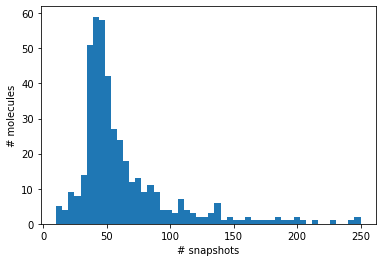

In [224]:
plt.hist([len(all_mols_and_targets[record_name].xyz) for record_name in all_mols_and_targets], bins=50);
plt.xlabel('# snapshots')
plt.ylabel('# molecules')

In [205]:
snapshot.dict().keys()

dict_keys(['id', 'hash_index', 'procedure', 'program', 'version', 'protocols', 'extras', 'stdout', 'stderr', 'error', 'task_id', 'manager_name', 'status', 'modified_on', 'created_on', 'provenance', 'driver', 'method', 'molecule', 'basis', 'keywords', 'return_result', 'properties', 'wavefunction', 'wavefunction_data_id'])

In [207]:
type(snapshot)

qcportal.models.records.ResultRecord

In [209]:
energies.shape, gradients.shape

((36,), (36, 27, 3))

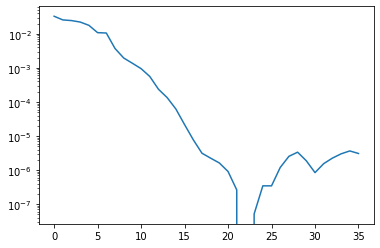

In [210]:
plt.plot(energies - min(energies))
plt.yscale('log')

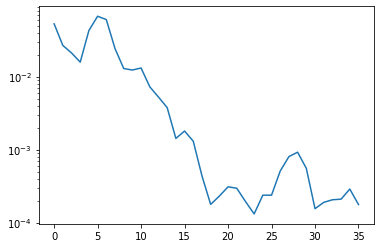

In [211]:
plt.plot(np.linalg.norm(gradients, axis=(1,2)))
plt.yscale('log')

In [212]:
snapshot.return_result.shape

(27, 3)

In [213]:
snapshot.method, snapshot.basis

('b3lyp-d3bj', 'dzvp')

In [214]:
d = snapshot.dict()
d.keys()

dict_keys(['id', 'hash_index', 'procedure', 'program', 'version', 'protocols', 'extras', 'stdout', 'stderr', 'error', 'task_id', 'manager_name', 'status', 'modified_on', 'created_on', 'provenance', 'driver', 'method', 'molecule', 'basis', 'keywords', 'return_result', 'properties', 'wavefunction', 'wavefunction_data_id'])

In [215]:
d['status']

<RecordStatusEnum.complete: 'COMPLETE'>

In [216]:
d['properties']

{'calcinfo_nbasis': 210,
 'calcinfo_nmo': 210,
 'calcinfo_nalpha': 49,
 'calcinfo_nbeta': 49,
 'calcinfo_natom': 27,
 'nuclear_repulsion_energy': 807.9855573138169,
 'return_energy': -631.660187480667,
 'scf_one_electron_energy': -2447.4730495348103,
 'scf_two_electron_energy': 1077.715113406683,
 'scf_vv10_energy': None,
 'scf_xc_energy': -69.84064492635655,
 'scf_dispersion_correction_energy': -0.04716374,
 'scf_dipole_moment': [30.354632824419465,
  -6.993853751378931,
  -3.011724025076463],
 'scf_total_energy': -631.660187480667,
 'scf_iterations': 15,
 'mp2_same_spin_correlation_energy': None,
 'mp2_opposite_spin_correlation_energy': None,
 'mp2_singles_energy': None,
 'mp2_doubles_energy': None,
 'mp2_total_correlation_energy': None,
 'mp2_correlation_energy': None,
 'mp2_total_energy': None,
 'mp2_dipole_moment': None,
 'ccsd_same_spin_correlation_energy': None,
 'ccsd_opposite_spin_correlation_energy': None,
 'ccsd_singles_energy': None,
 'ccsd_doubles_energy': None,
 'ccsd_cor

In [217]:
d['extras'].keys()

dict_keys(['qcvars'])

In [218]:
qcvars = d['extras']['qcvars']
qcvars.keys()

dict_keys(['-D ENERGY', 'B3LYP-D3(BJ) DISPERSION CORRECTION ENERGY', 'CURRENT DIPOLE X', 'CURRENT DIPOLE Y', 'CURRENT DIPOLE Z', 'CURRENT ENERGY', 'CURRENT REFERENCE ENERGY', 'DFT FUNCTIONAL TOTAL ENERGY', 'DFT TOTAL ENERGY', 'DFT VV10 ENERGY', 'DFT XC ENERGY', 'DISPERSION CORRECTION ENERGY', 'NUCLEAR REPULSION ENERGY', 'ONE-ELECTRON ENERGY', 'PCM POLARIZATION ENERGY', 'SCF DIPOLE X', 'SCF DIPOLE Y', 'SCF DIPOLE Z', 'SCF ITERATION ENERGY', 'SCF ITERATIONS', 'SCF QUADRUPOLE XX', 'SCF QUADRUPOLE XY', 'SCF QUADRUPOLE XZ', 'SCF QUADRUPOLE YY', 'SCF QUADRUPOLE YZ', 'SCF QUADRUPOLE ZZ', 'SCF TOTAL ENERGY', 'TWO-ELECTRON ENERGY', 'CURRENT GRADIENT', 'SCF TOTAL GRADIENT', '-D GRADIENT', 'MAYER_INDICES', 'WIBERG_LOWDIN_INDICES'])

In [219]:
qcvars['SCF TOTAL ENERGY']

-631.660187480667

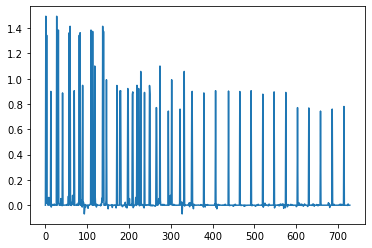

In [220]:
plt.plot(qcvars['MAYER_INDICES'])

In [221]:
qcvars['CURRENT ENERGY']

-631.660187480667

In [ ]:
# save what we have for now...

In [226]:
ds.df.to_hdf('some_of_optimization_dataset.h5', key='df')

In [227]:
from pickle import dump

with open('all_mols_and_targets.pkl', 'wb') as f:
    dump(all_mols_and_targets, f)

In [229]:
mol_with_targets = all_mols_and_targets[record_names[0]]

### Quick inspection

In [254]:
from simtk import unit

particle = unit.mole.create_unit(6.02214076e23 ** -1, 'particle', 'particle')
energy_unit_qc = unit.hartree / particle

energy_unit_report = unit.kilocalorie_per_mole

def to_report_unit(e_in_qc_unit):
    return (e_in_qc_unit * energy_unit_qc).value_in_unit(energy_unit_report)

In [255]:
stddevs = np.array([np.std(to_report_unit(m.energies)) for m in all_mols_and_targets.values()])

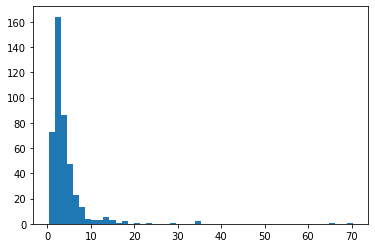

In [256]:
plt.hist(stddevs, bins=50);

In [257]:
np.median(stddevs)

2.874711415368434

In [262]:
np.max(stddevs)

70.3148649397403

In [270]:
record_name_with_biggest_energy_range = list(all_mols_and_targets.keys())[np.argmax(stddevs)]
record_name_with_biggest_energy_range

'c[c@](cc1ccc(cc1)o)(c(=o)[o-])[nh3+]-2'

In [271]:
biggest_energy_range = all_mols_and_targets[record_name_with_biggest_energy_range]

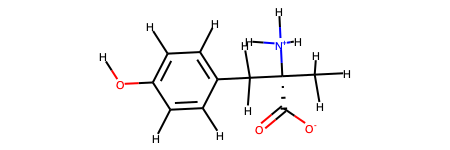

In [268]:
biggest_energy_range.offmol

Text(0, 0.5, 'relative energy (kilocalorie/mole)')

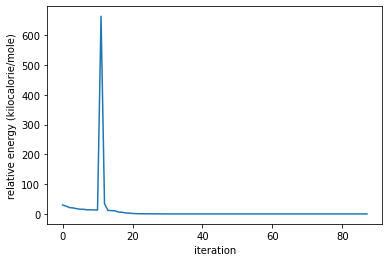

In [273]:
energies = to_report_unit(biggest_energy_range.energies)
plt.plot(energies - min(energies))
plt.xlabel('iteration')
plt.ylabel(f'relative energy ({energy_unit_report})')